In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

In [3]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [6]:
df.shape

(74283, 25)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df.drop(columns='Education Level',inplace=True)

In [9]:
df.shape

(74283, 24)

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

for col in categorical_cols:
    print(f"Value counts for column: {col}\n")
    print(df[col].value_counts(), "\n" + "-"*40 + "\n")  # Display counts for each unique value


Value counts for column: Country

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Gender

Gender
Female    37249
Male      37034
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Physical Activity Level

Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Smoking Status

Smoking Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64 
---

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns
categorical_cols

Index(['Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'Alzheimer’s Diagnosis'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Alzheimer’s Diagnosis']),df['Alzheimer’s Diagnosis'], test_size=0.2)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((59426, 23), (14857, 23), (59426,), (14857,))

In [14]:
# List of nominal and ordinal columns as previously defined
nominal_columns = [
    'Country', 'Gender', 'Smoking Status', 'Alcohol Consumption', 'Diabetes','Hypertension',
    'Family History of Alzheimer’s', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
    'Urban vs Rural Living'
]

ordinal_columns = [
    'Physical Activity Level', 'Cholesterol Level', 'Depression Level', 'Sleep Quality', 'Dietary Habits',
    'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels'
]


In [15]:
# Define the categories for each ordinal feature
category_orders = [
    ['Low','Medium','High'], 
    ['Normal', 'High'],        
    ['Low','Medium','High'],  
    ['Poor','Average','Good'],  
    ['Unhealthy', 'Average', 'Healthy'],  
    ['Low','Medium','High'],  
    ['Low','Medium','High'], 
    ['Low','Medium','High'],  
    ['Low','Medium','High'],  
]

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1',OrdinalEncoder(categories=category_orders),ordinal_columns),
        ('tnf2',OneHotEncoder(sparse_output=False,drop='first'),nominal_columns)
    ],remainder='passthrough'
)

In [18]:
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

In [19]:
X_train_encoded.shape , X_test_encoded.shape

((59426, 45), (14857, 45))

In [20]:
y_train_en = pd.get_dummies(y_train, drop_first=True,dtype=int)
y_test_en = pd.get_dummies(y_test, drop_first=True,dtype=int)

In [21]:
# # Normalize features
# scaler = StandardScaler()
# X_train_sc = scaler.fit_transform(X_train_encoded)
# X_test_sc = scaler.transform(X_test_encoded)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [70]:
# Build advanced neural network
model = Sequential([
    Input(shape=(X_train_encoded.shape[1],)),  # Ensure this matches X_train_encoded
    Dense(200, kernel_initializer='he_uniform', activation='relu'),
    Dense(100, kernel_initializer='he_uniform', activation='relu'),
    Dense(80, kernel_initializer='he_uniform', activation='relu'),
    Dense(50, kernel_initializer='he_uniform', activation='relu'),
    Dense(10, kernel_initializer='he_uniform', activation='relu'),
    Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
])

In [72]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
# Train model
model_history = model.fit(X_train_encoded,y_train_en, epochs=30, batch_size=16, validation_data=(X_test_encoded, y_test_en))

Epoch 1/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6379 - loss: 0.6934 - val_accuracy: 0.6749 - val_loss: 0.5945
Epoch 2/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6867 - loss: 0.5861 - val_accuracy: 0.6980 - val_loss: 0.5686
Epoch 3/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7016 - loss: 0.5679 - val_accuracy: 0.7074 - val_loss: 0.5602
Epoch 4/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7062 - loss: 0.5584 - val_accuracy: 0.7077 - val_loss: 0.5657
Epoch 5/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7112 - loss: 0.5501 - val_accuracy: 0.7126 - val_loss: 0.5501
Epoch 6/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7083 - loss: 0.5522 - val_accuracy: 0.6950 - val_loss: 0.5763
Epoch 7/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7138 - loss: 0.5446 - val_accuracy: 0.7127 - val_loss: 0.5459
Epoch 8/30
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7110 - loss: 0.5451 - 

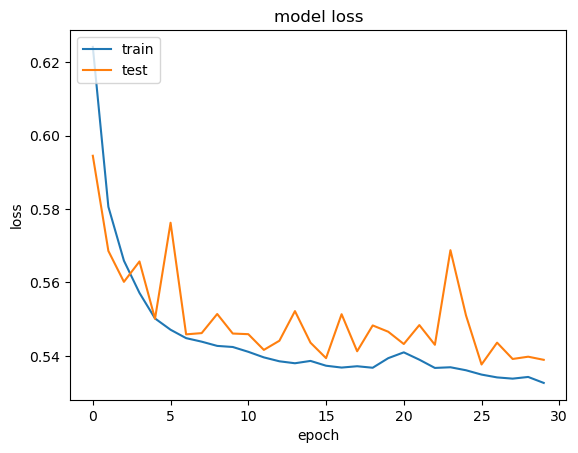

In [76]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


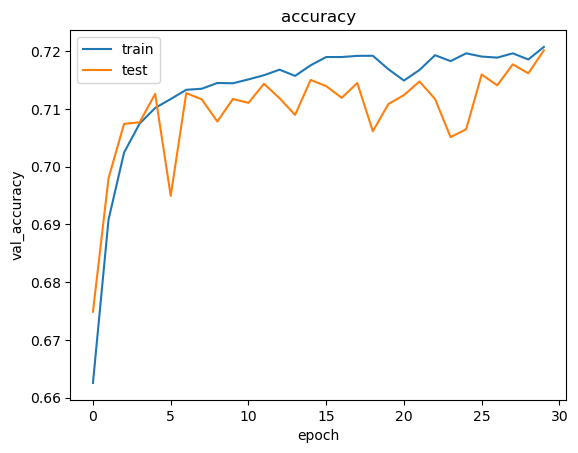

In [78]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
# Predicting the Test set results
y_pred = model.predict(X_test_encoded)
y_pred = (y_pred > 0.5)

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


In [82]:
from sklearn.metrics import accuracy_score
# Assuming you have your true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_test_en, y_pred) 
print("Accuracy Score:", accuracy) 

Accuracy Score: 0.7201319243454264


In [84]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test_en, y_pred)
cm

array([[6343, 2360],
       [1798, 4356]], dtype=int64)

In [86]:
print("\nClassification Report:\n", classification_report(y_test_en, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      8703
           1       0.65      0.71      0.68      6154

    accuracy                           0.72     14857
   macro avg       0.71      0.72      0.72     14857
weighted avg       0.73      0.72      0.72     14857



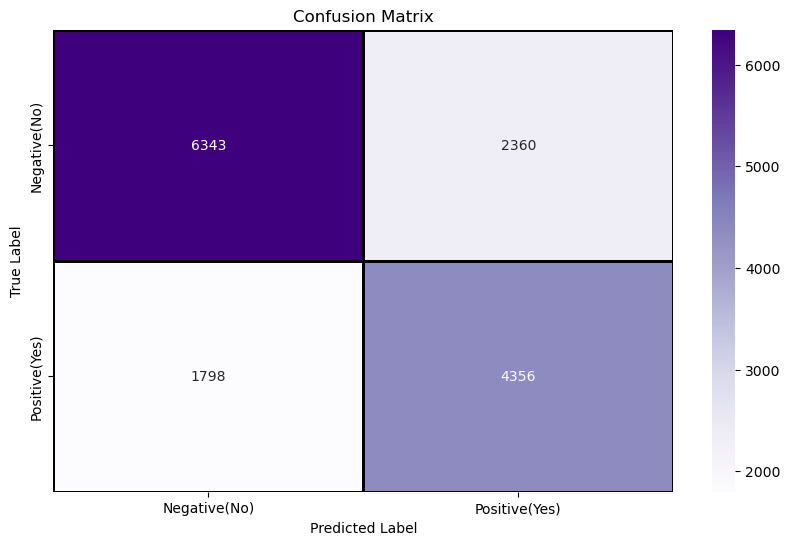

In [88]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Negative(No)', 'Positive(Yes)'], 
            yticklabels=['Negative(No)', 'Positive(Yes)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()